# Credit Risk Analysis

### NECESSARY IMPORTS

In [28]:
# pip install seaborn
# pip install statsmodels
# pip install scikit-learn
# pip install pandas


SyntaxError: invalid syntax (1232889146.py, line 2)

In [29]:
import boto3
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# from dotenv import load_dotenv #for env variables
from imp import reload #for testing

from src import data_utils, config
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder



### GET DATA

In [2]:
reload(data_utils)
reload(config)

# get data
app_train, app_test, columns_description = data_utils.get_datasets()


c:\Users\Usuario\OneDrive\Documents\GitHub\credit-risk-analysis\src\data_utils.py:51: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  app_train = pd.read_csv(config.DATASET_TRAIN, delimiter='\t', encoding='latin1', header=None)


In [3]:
app_train.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


In [4]:
columns_description

,Var_Title,Var_Description,Field_Content
Var_Id,,,
1,ID_CLIENT,Sequential number for the applicant (to be use...,"1-50000, 50001-70000, 70001-90000"
2,CLERK_TYPE,Not informed,C
3,PAYMENT_DAY,"Day of the month for bill payment, chosen by t...","1,5,10,15,20,25"
4,APPLICATION_SUBMISSION_TYPE,Indicates if the application was submitted via...,"Web, Carga"
5,QUANT_ADDITIONAL_CARDS,Quantity of additional cards asked for in the ...,"1,2,NULL"
6,POSTAL_ADDRESS_TYPE,Indicates if the address for posting is the ho...,1.2
7,SEX,NaN,"M=Male, F=Female"
8,MARITAL_STATUS,Encoding not informed,"1,2,3,4,5,6,7"
9,QUANT_DEPENDANTS,NaN,"0, 1, 2, ..."


In [5]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       50000 non-null  int64  
 1   CLERK_TYPE                      50000 non-null  object 
 2   PAYMENT_DAY                     50000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 6   SEX                             50000 non-null  object 
 7   MARITAL_STATUS                  50000 non-null  int64  
 8   QUANT_DEPENDANTS                50000 non-null  int64  
 9   EDUCATION_LEVEL                 50000 non-null  int64  
 10  STATE_OF_BIRTH                  50000 non-null  object 
 11  CITY_OF_BIRTH                   50000 non-null  object 
 12  NACIONALITY                     

In [6]:
# Verificar si hay datos faltantes en app_train
print("Valores faltantes en el conjunto de entrenamiento:")
print(app_train.isnull().sum())

# Verificar si hay datos faltantes en app_test
print("Valores faltantes en el conjunto de prueba:")
print(app_test.isnull().sum())

# Verificar si hay duplicados en app_train
print("Datos duplicados en el conjunto de entrenamiento:")
print(app_train.duplicated().sum())

# Verificar si hay duplicados en app_test
print("Datos duplicados en el conjunto de prueba:")
print(app_test.duplicated().sum())


Valores faltantes en el conjunto de entrenamiento:
ID_CLIENT                             0
CLERK_TYPE                            0
PAYMENT_DAY                           0
APPLICATION_SUBMISSION_TYPE           0
QUANT_ADDITIONAL_CARDS                0
POSTAL_ADDRESS_TYPE                   0
SEX                                   0
MARITAL_STATUS                        0
QUANT_DEPENDANTS                      0
EDUCATION_LEVEL                       0
STATE_OF_BIRTH                        0
CITY_OF_BIRTH                         0
NACIONALITY                           0
RESIDENCIAL_STATE                     0
RESIDENCIAL_CITY                      0
RESIDENCIAL_BOROUGH                   0
FLAG_RESIDENCIAL_PHONE                0
RESIDENCIAL_PHONE_AREA_CODE           0
RESIDENCE_TYPE                     1349
MONTHS_IN_RESIDENCE                3777
FLAG_MOBILE_PHONE                     0
FLAG_EMAIL                            0
PERSONAL_MONTHLY_INCOME               0
OTHER_INCOMES                

In [ ]:
print(app_train.columns[app_train.columns.duplicated()])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_45828\3193797202.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = app_train.corr()


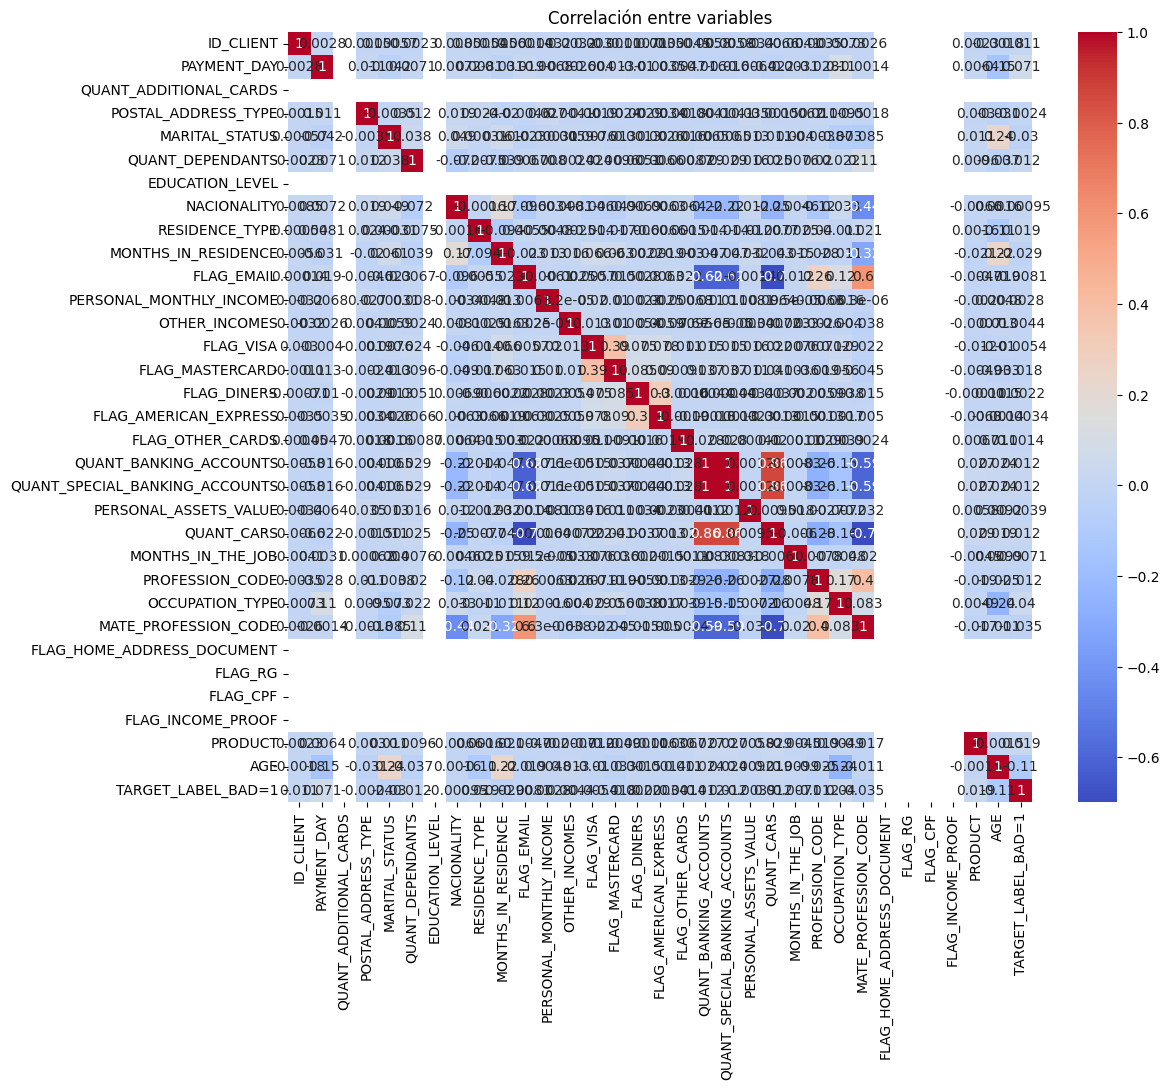

'NACIONALITY' is in the DataFrame.
                        Feature 1                       Feature 2  Correlation
4          QUANT_BANKING_ACCOUNTS  QUANT_SPECIAL_BANKING_ACCOUNTS     1.000000
5          QUANT_BANKING_ACCOUNTS                      QUANT_CARS     0.860860
7  QUANT_SPECIAL_BANKING_ACCOUNTS                      QUANT_CARS     0.860860
9                      QUANT_CARS            MATE_PROFESSION_CODE     0.698387
2                      FLAG_EMAIL                      QUANT_CARS     0.697017
0                      FLAG_EMAIL          QUANT_BANKING_ACCOUNTS     0.616508
1                      FLAG_EMAIL  QUANT_SPECIAL_BANKING_ACCOUNTS     0.616508
3                      FLAG_EMAIL            MATE_PROFESSION_CODE     0.599763
6          QUANT_BANKING_ACCOUNTS            MATE_PROFESSION_CODE     0.592534
8  QUANT_SPECIAL_BANKING_ACCOUNTS            MATE_PROFESSION_CODE     0.592534


C:\Users\Usuario\AppData\Local\Temp\ipykernel_45828\3193797202.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  highly_correlated_features = highly_correlated_features.append({'Feature 1': column1, 'Feature 2': column2, 'Correlation': correlation}, ignore_index=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_45828\3193797202.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  highly_correlated_features = highly_correlated_features.append({'Feature 1': column1, 'Feature 2': column2, 'Correlation': correlation}, ignore_index=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_45828\3193797202.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  highly_correlated_features = highly_correlated_features.append({'Feature 

In [26]:
# Verificar la correlación entre variables
correlation_matrix = app_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()

# Eliminar columnas duplicadas
app_train = app_train.loc[:,~app_train.columns.duplicated()]

# Comprueba si 'NACIONALITY' está en tu DataFrame
if 'NACIONALITY' in app_train.columns:
    print("'NACIONALITY' is in the DataFrame.")
else:
    print("'NACIONALITY' is not in the DataFrame. Please check your data.")

# Establecer un valor de correlación mínima para ser considerado 'alta' 
# #(de 0.1 a 0.3 corr débil, de 0.3 a 0.5 se corr moderada, mayor a 0.5 se considera una corr fuerte.)
high_corr_threshold = 0.5

# Crear una copia de la matriz de correlación y reemplazar la diagonal principal por ceros
correlation_matrix_no_diag = correlation_matrix.copy()
np.fill_diagonal(correlation_matrix_no_diag.values, 0)

# Crear un DataFrame para almacenar los pares de variables correlacionadas
highly_correlated_features = pd.DataFrame(columns=['Feature 1', 'Feature 2', 'Correlation'])

# Encontrar las características altamente correlacionadas
for i, column1 in enumerate(correlation_matrix_no_diag.columns):
    for j, column2 in enumerate(correlation_matrix_no_diag.columns[i + 1:]):  # Comienza desde i+1 para no repetir pares
        correlation = abs(correlation_matrix_no_diag[column1][column2])
        if correlation >= high_corr_threshold:
            highly_correlated_features = highly_correlated_features.append({'Feature 1': column1, 'Feature 2': column2, 'Correlation': correlation}, ignore_index=True)

# Ordenar las características altamente correlacionadas en orden descendente
highly_correlated_features = highly_correlated_features.sort_values(by='Correlation', ascending=False)

# Mostrar las características altamente correlacionadas
print(highly_correlated_features)



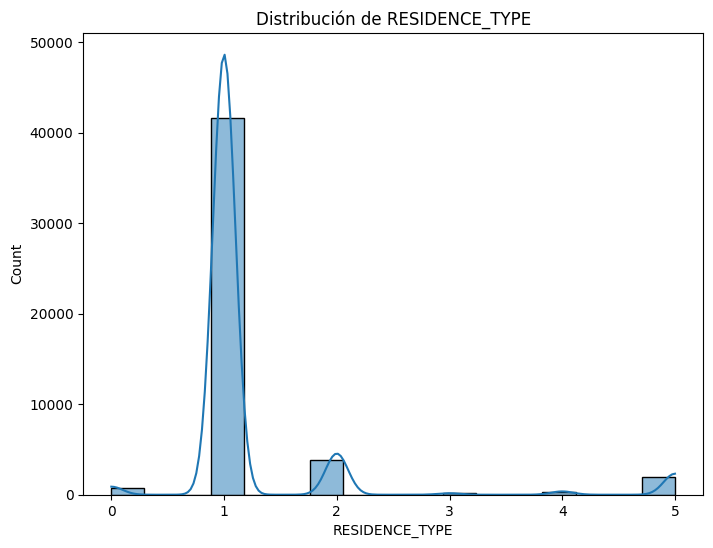

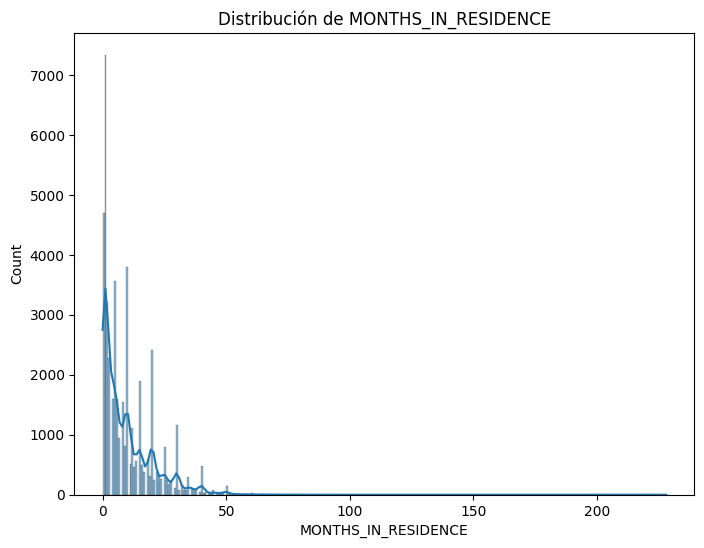

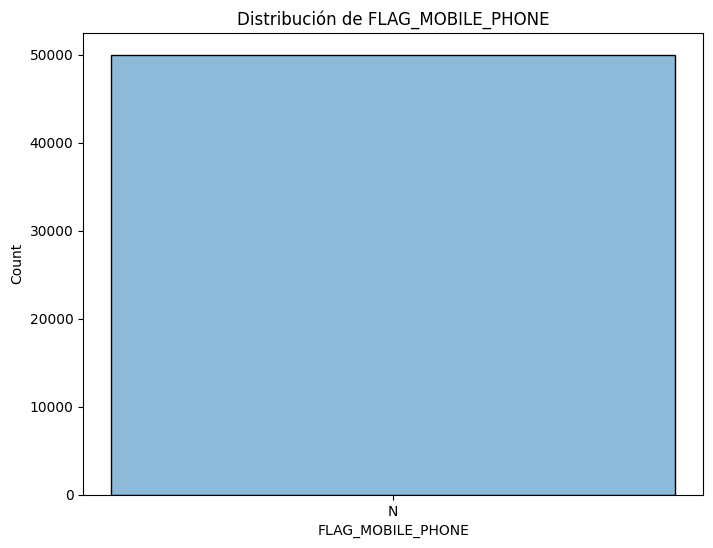

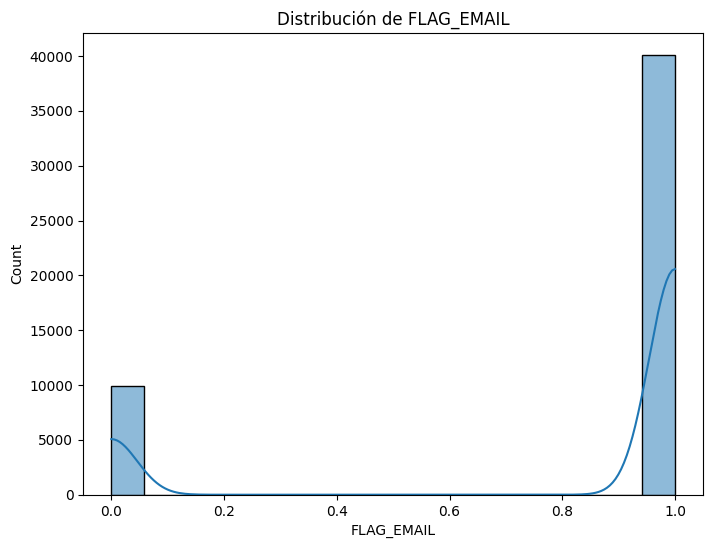

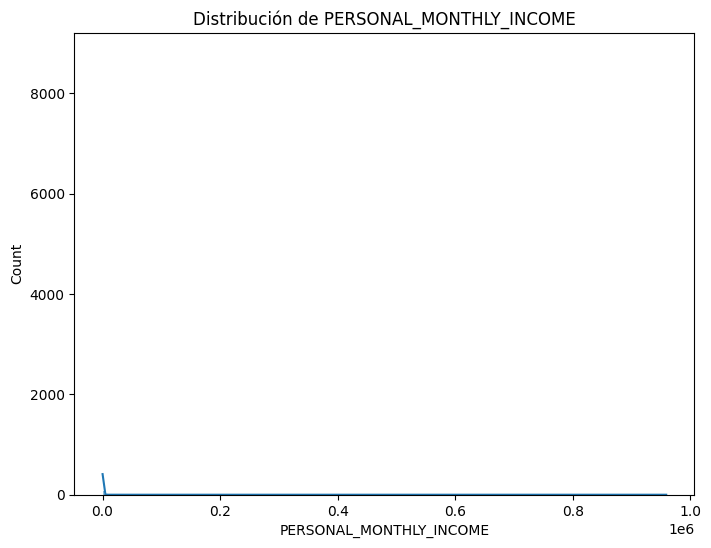

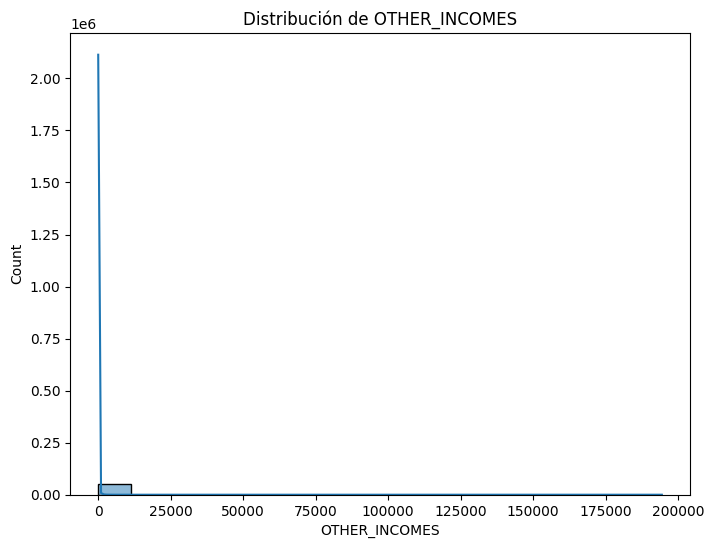

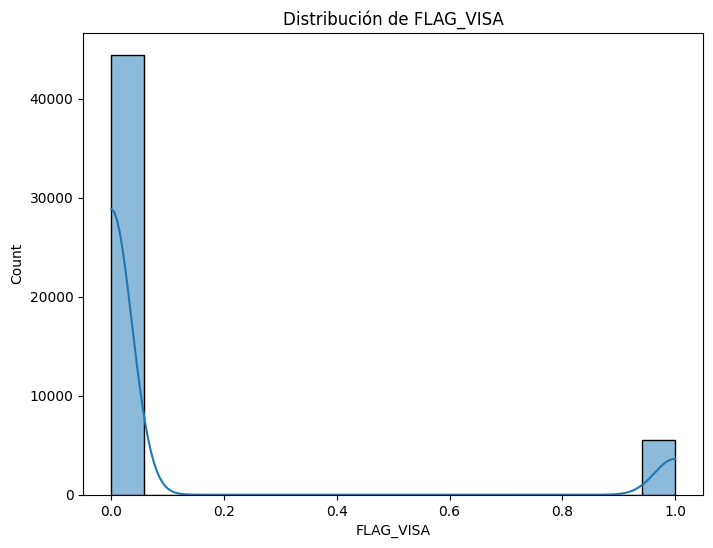

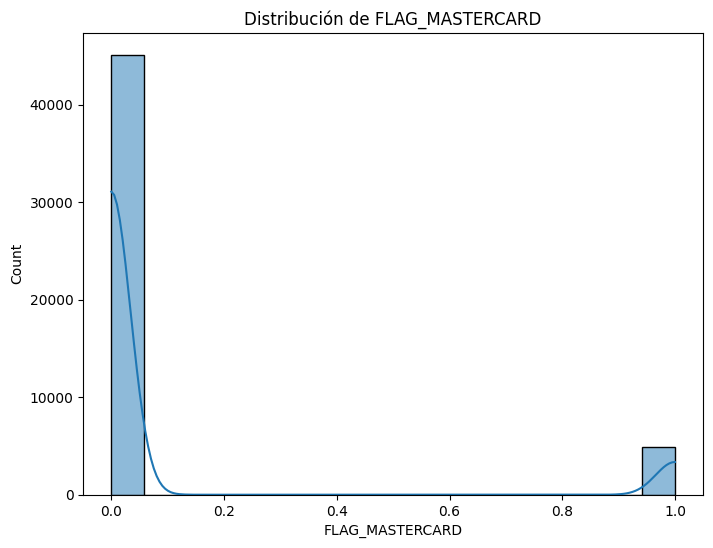

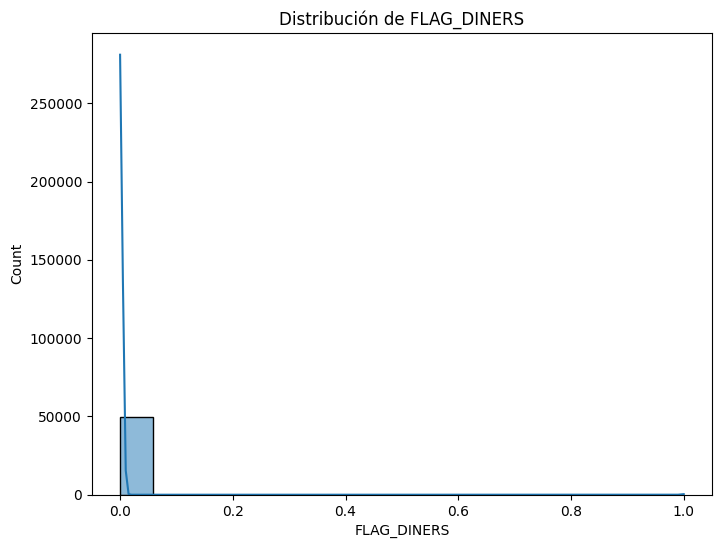

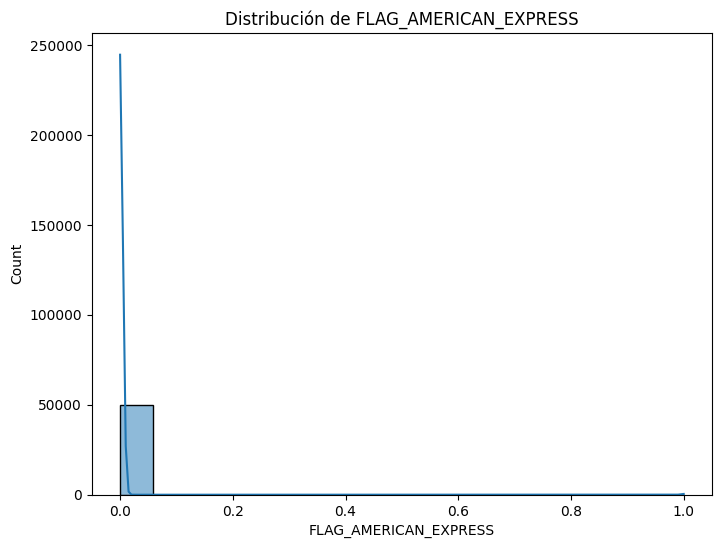

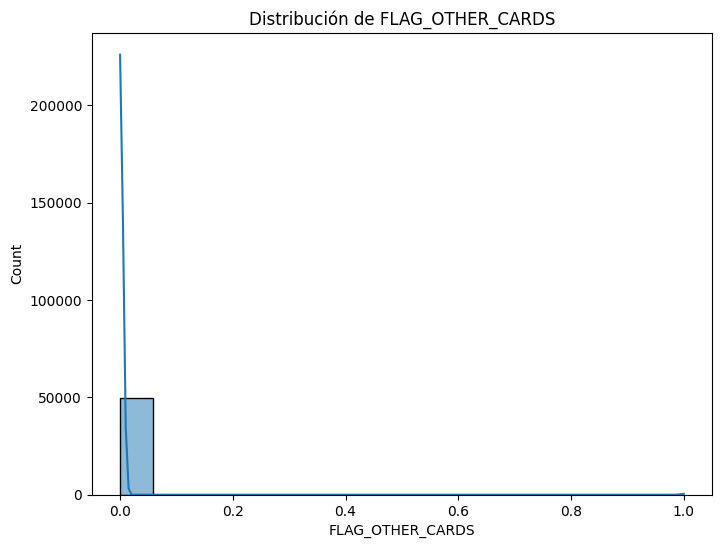

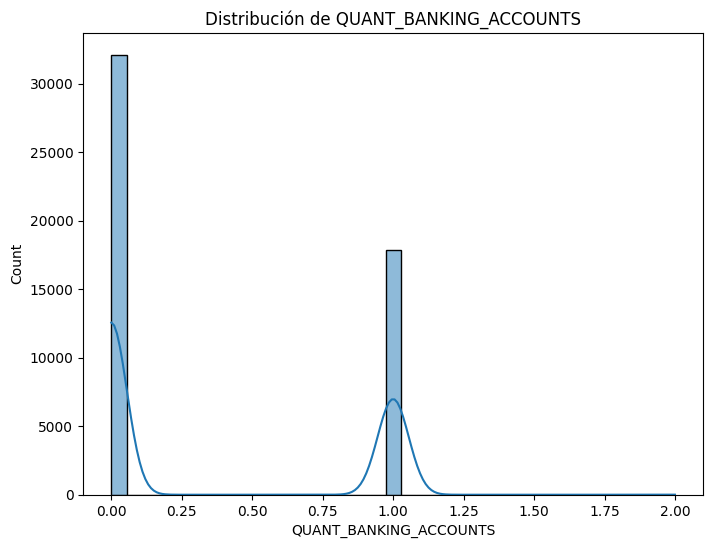

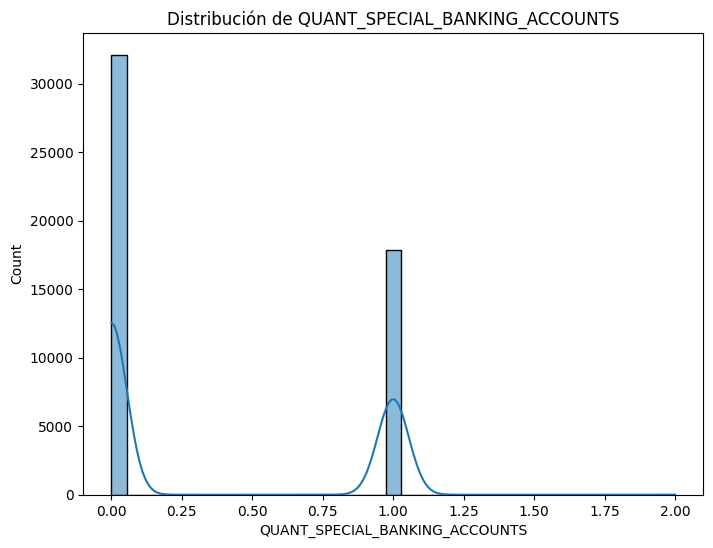

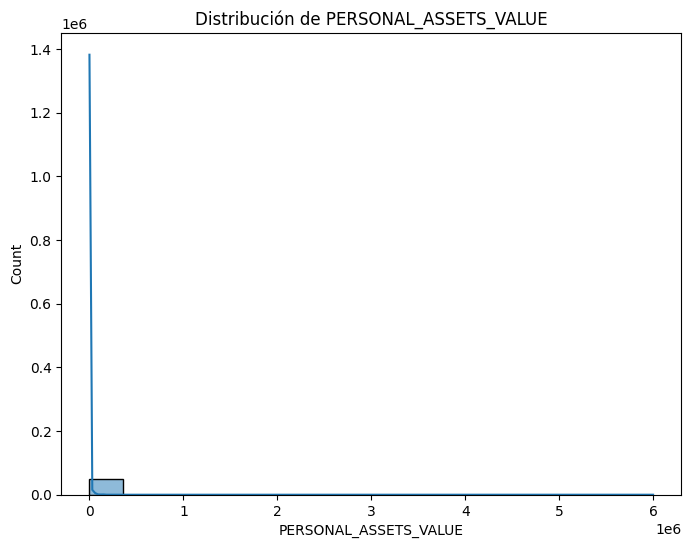

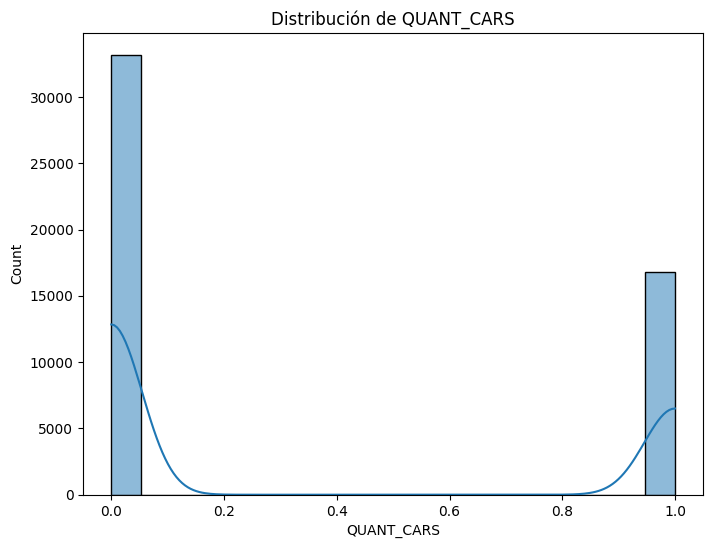

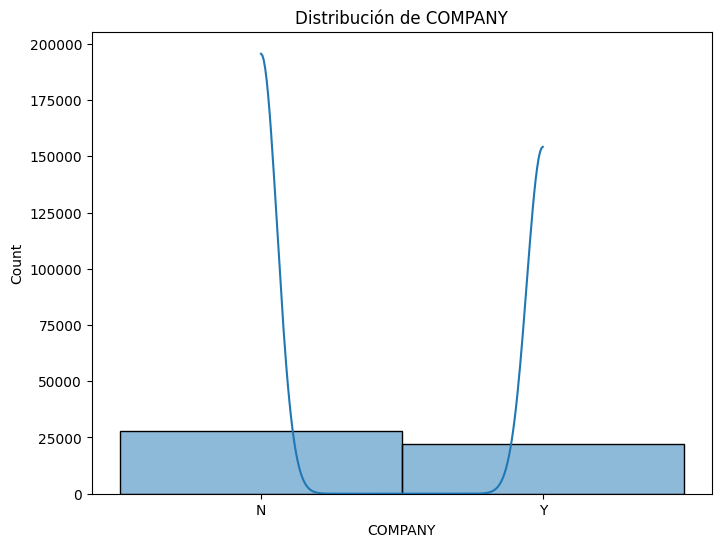

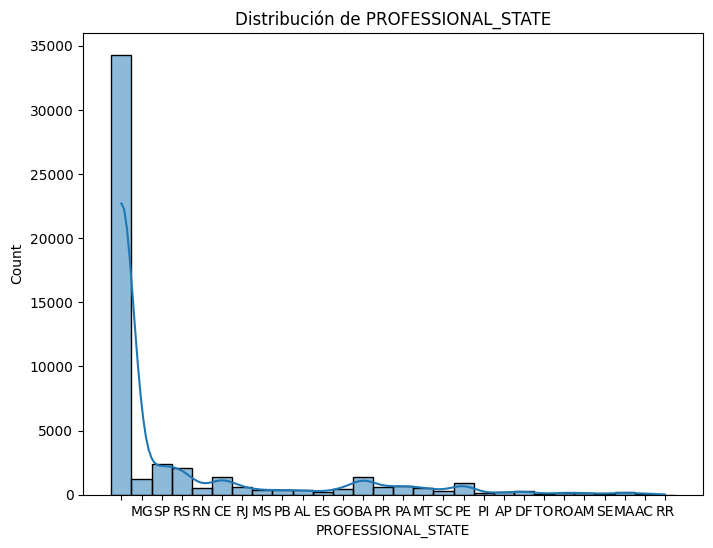

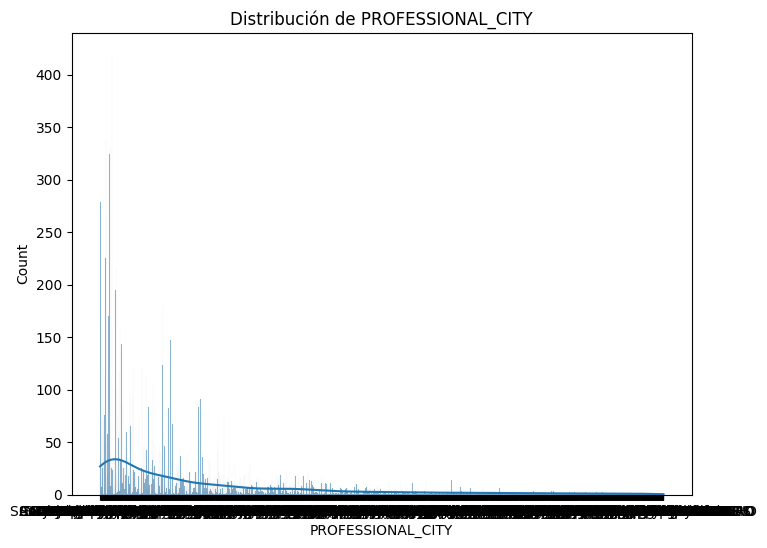

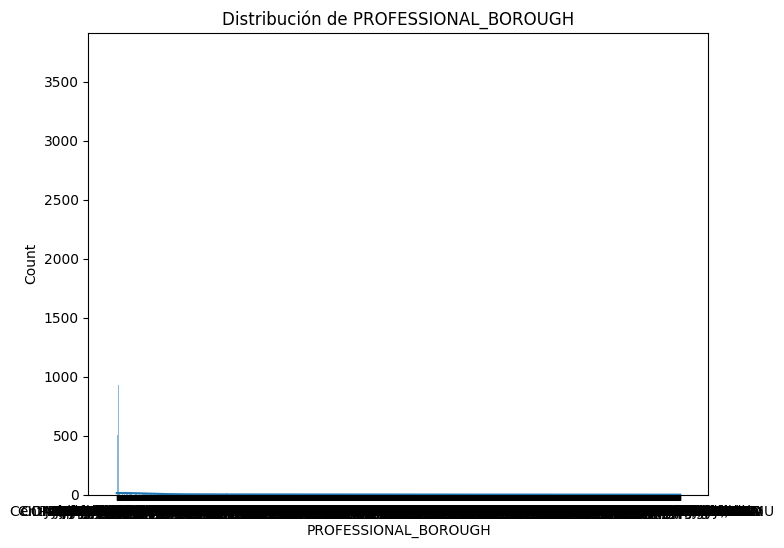

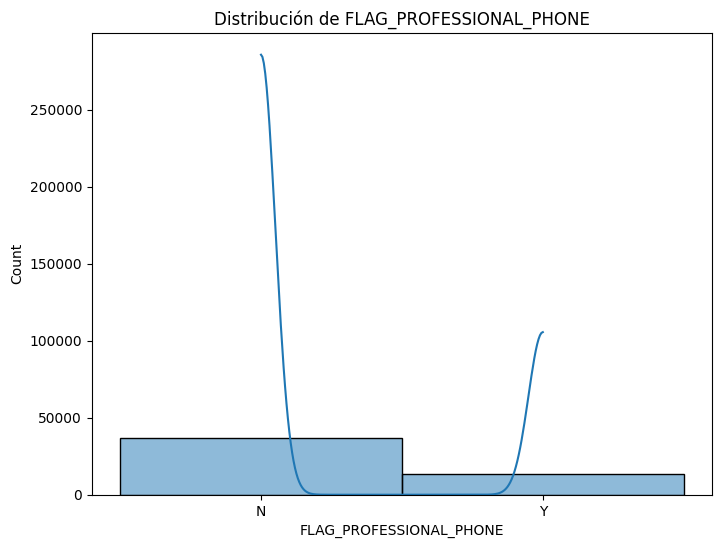

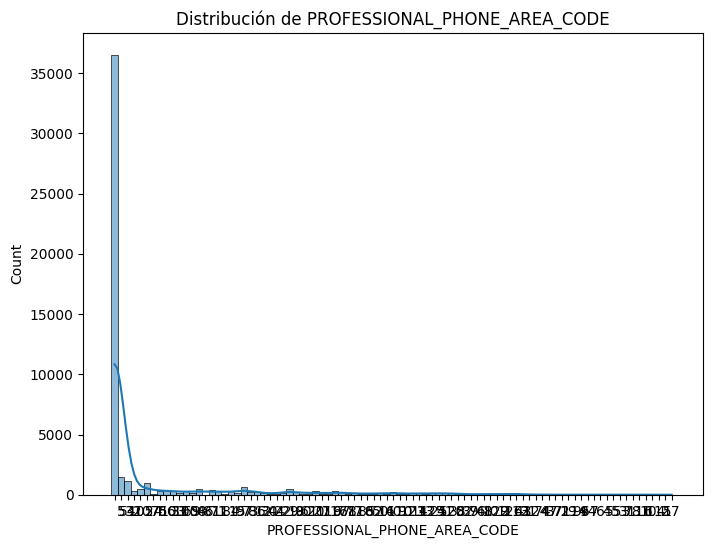

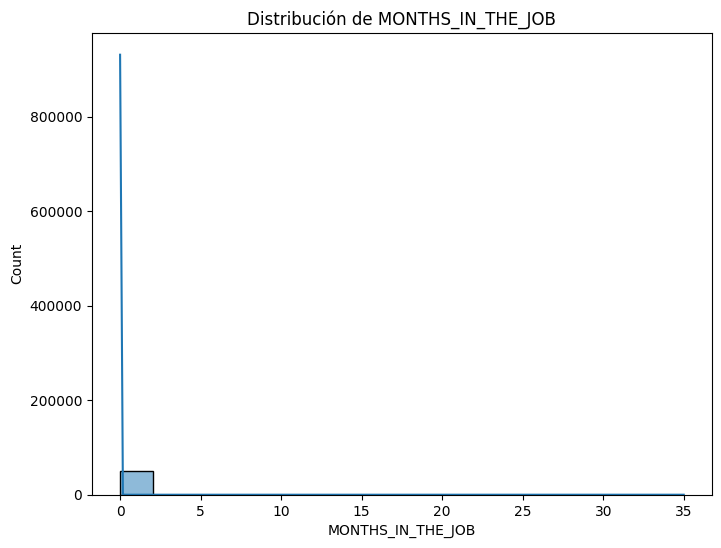

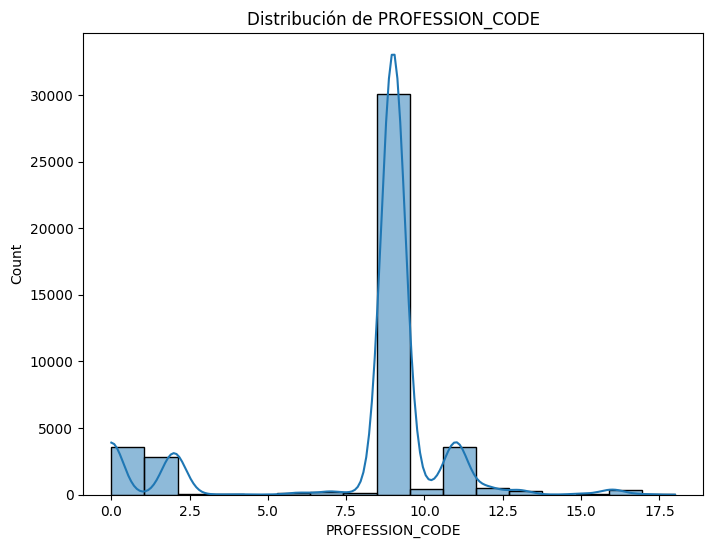

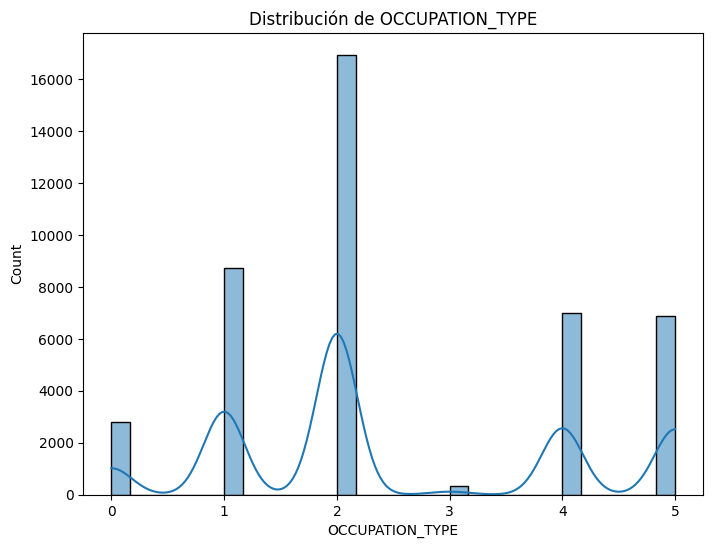

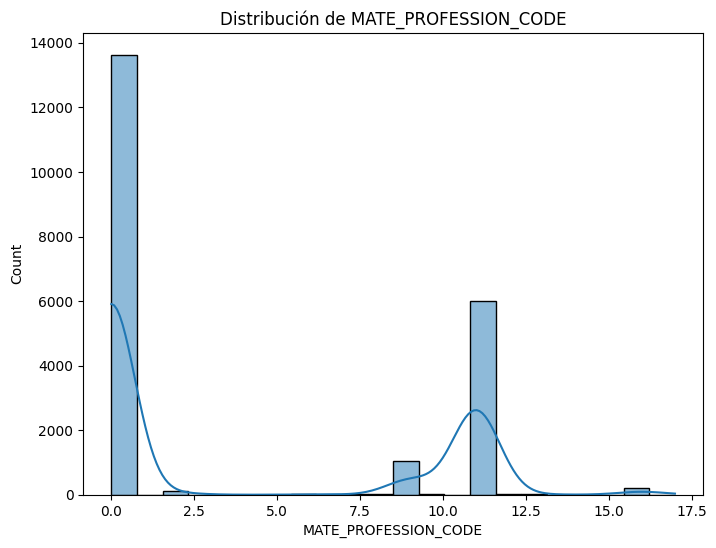

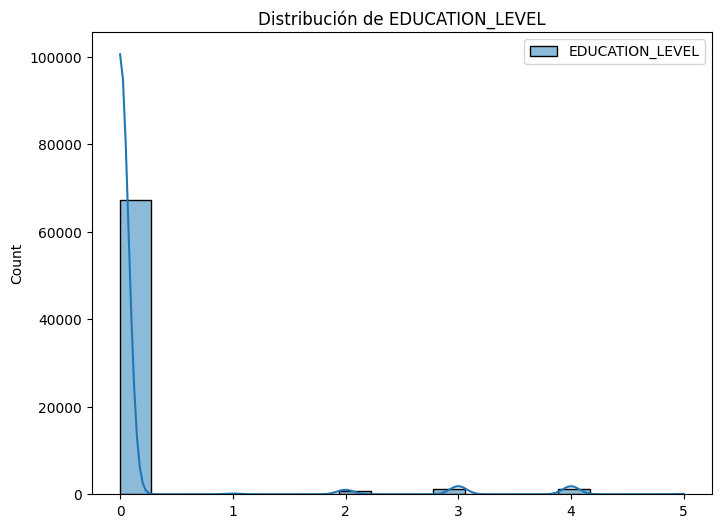

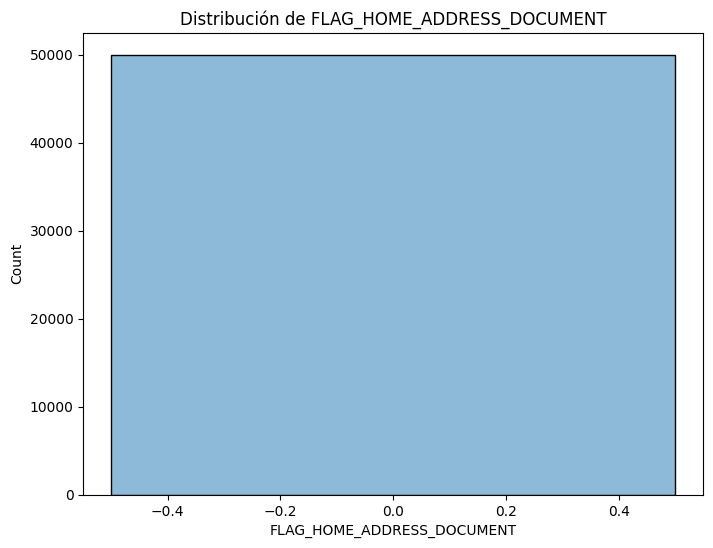

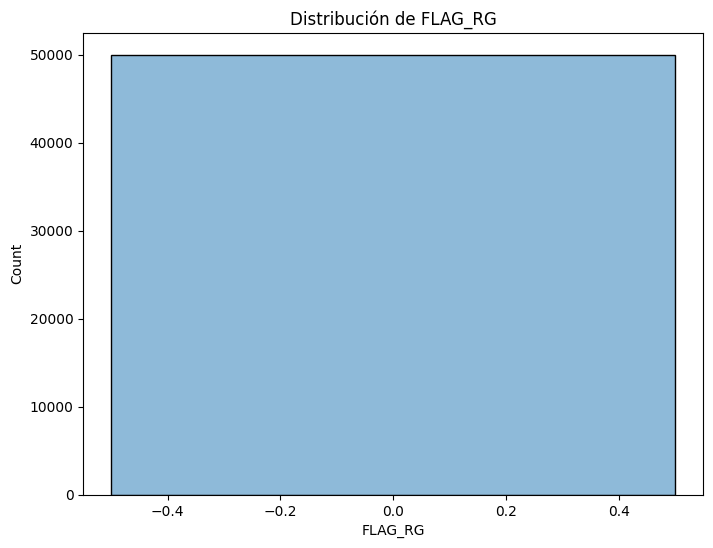

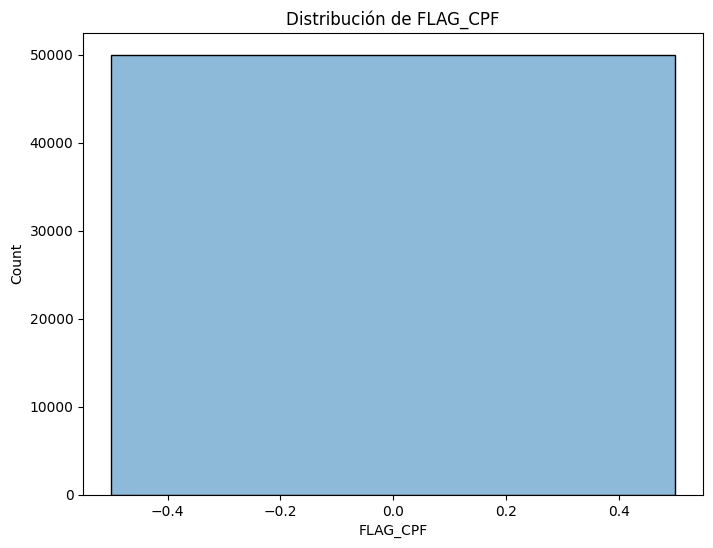

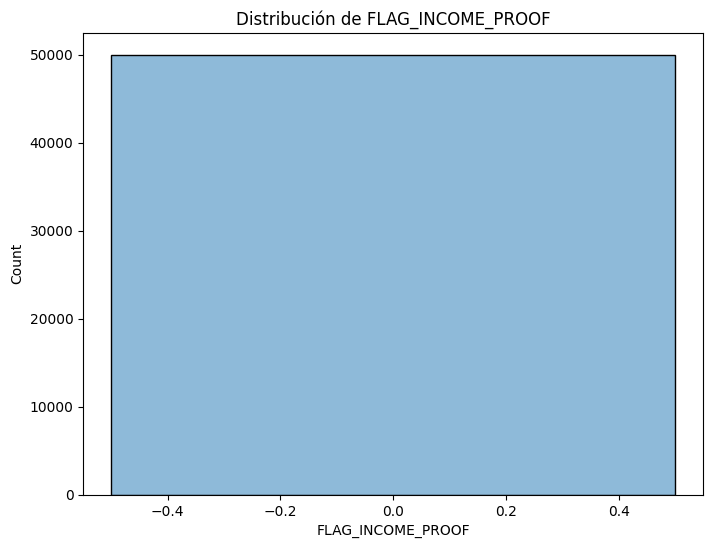

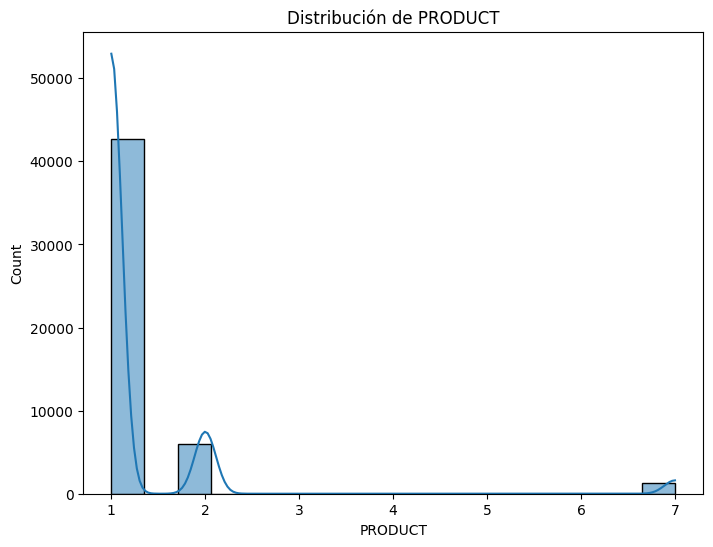

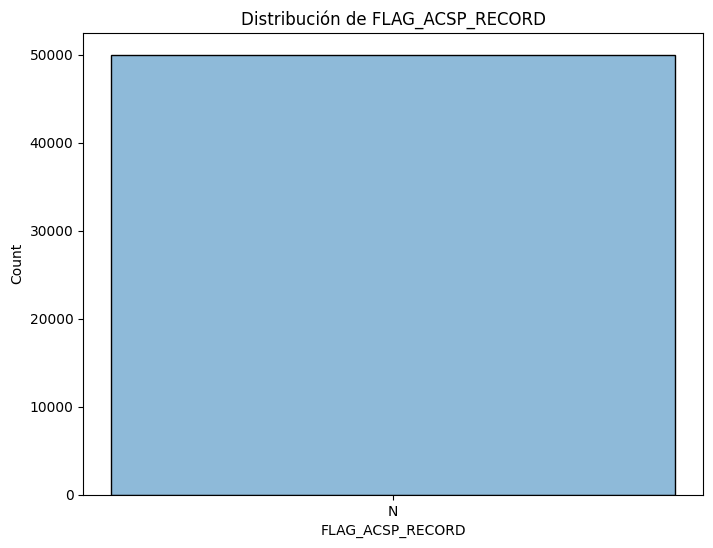

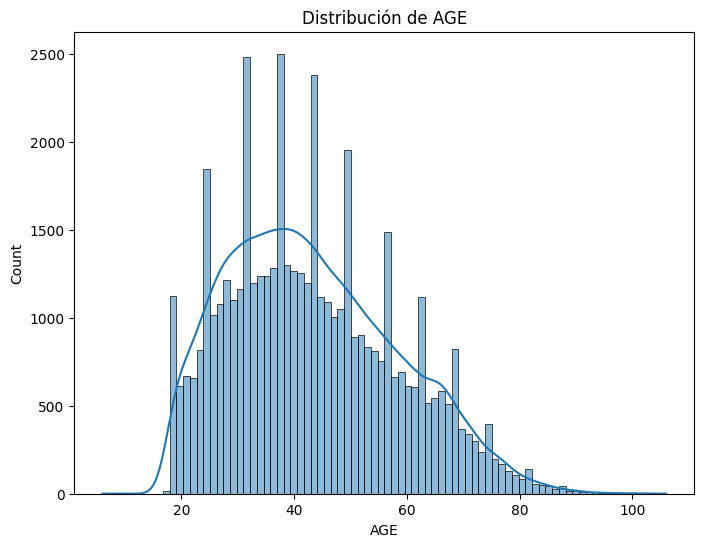

ValueError: Unable to parse string "#DIV/0!" at position 48923

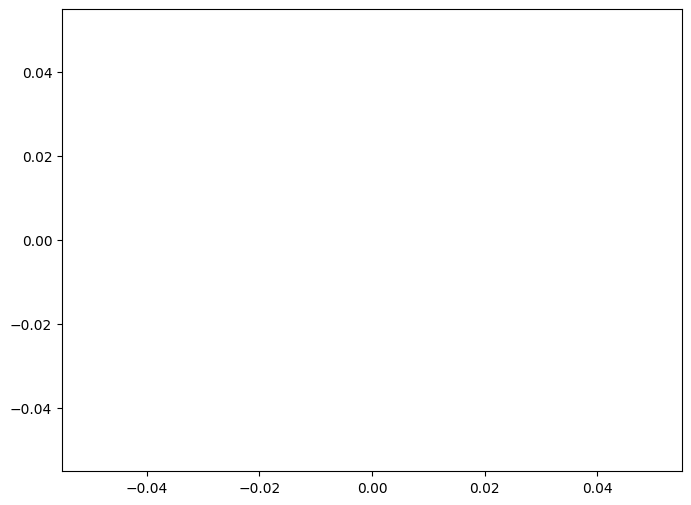

In [14]:
numeric_columns = app_train.columns[18:53]  # Selecciona las columnas numéricas

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(app_train[column].dropna(), kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()


RandomForest para el análisis de importancia de características

In [33]:
from sklearn.impute import SimpleImputer

# Asignamos la variable objetivo a 'y' y las características a 'X'
y = app_train['TARGET_LABEL_BAD=1']
X = app_train.drop(columns='TARGET_LABEL_BAD=1')

# Imputar los valores perdidos
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype(str)
        X[col] = cat_imputer.fit_transform(X[col].values.reshape(-1, 1))
    else:
        X[col] = num_imputer.fit_transform(X[col].values.reshape(-1, 1))

# Codificar las características categóricas
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Obtener la importancia de las características
importance = pd.DataFrame(data={
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance)


                           Feature  Importance
0                        ID_CLIENT    0.076366
49                             AGE    0.073771
15             RESIDENCIAL_BOROUGH    0.071324
22         PERSONAL_MONTHLY_INCOME    0.068241
11                   CITY_OF_BIRTH    0.066068
14                RESIDENCIAL_CITY    0.062292
51              PROFESSIONAL_ZIP_3    0.055492
50               RESIDENCIAL_ZIP_3    0.055148
19             MONTHS_IN_RESIDENCE    0.051383
17     RESIDENCIAL_PHONE_AREA_CODE    0.034379
10                  STATE_OF_BIRTH    0.033152
2                      PAYMENT_DAY    0.030183
13               RESIDENCIAL_STATE    0.027736
41                 OCCUPATION_TYPE    0.024322
36            PROFESSIONAL_BOROUGH    0.023138
35               PROFESSIONAL_CITY    0.022628
8                 QUANT_DEPENDANTS    0.022364
40                 PROFESSION_CODE    0.022355
7                   MARITAL_STATUS    0.020756
38    PROFESSIONAL_PHONE_AREA_CODE    0.015072
18           

regresión con eliminación hacia atrás para el análisis de importancia de características

In [35]:
# app_train es el DataFrame y 'TARGET_LABEL_BAD=1' es la variable objetivo
X = app_train.drop('TARGET_LABEL_BAD=1', axis=1)
y = app_train['TARGET_LABEL_BAD=1']

# Codificación de las características categóricas
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype(str)  # Convertir a string cualquier objeto que no sea string
        X[col] = label_encoder.fit_transform(X[col])

# Tratamiento de los valores nulos
X.fillna(-99999, inplace=True)  # Rellenar los valores nulos con un valor fuera de rango

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

# Realizar la eliminación hacia atrás
cols = list(X.columns)
pmax = 1

while (len(cols) > 0):
    p = []
    X_1 = X_with_constant[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index=cols)  
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    
    if(pmax > 0.05):
        cols.remove(feature_with_p_max)
    else:
        break

selected_features_BE = cols
print(selected_features_BE)

['ID_CLIENT', 'PAYMENT_DAY', 'APPLICATION_SUBMISSION_TYPE', 'SEX', 'QUANT_DEPENDANTS', 'CITY_OF_BIRTH', 'RESIDENCIAL_STATE', 'FLAG_RESIDENCIAL_PHONE', 'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'FLAG_MASTERCARD', 'QUANT_CARS', 'COMPANY', 'PROFESSIONAL_CITY', 'FLAG_PROFESSIONAL_PHONE', 'PROFESSIONAL_PHONE_AREA_CODE', 'MATE_PROFESSION_CODE', 'AGE', 'RESIDENCIAL_ZIP_3', 'PROFESSIONAL_ZIP_3']


In [38]:
columns_description

,Var_Title,Var_Description,Field_Content
Var_Id,,,
1,ID_CLIENT,Sequential number for the applicant (to be use...,"1-50000, 50001-70000, 70001-90000"
2,CLERK_TYPE,Not informed,C
3,PAYMENT_DAY,"Day of the month for bill payment, chosen by t...","1,5,10,15,20,25"
4,APPLICATION_SUBMISSION_TYPE,Indicates if the application was submitted via...,"Web, Carga"
5,QUANT_ADDITIONAL_CARDS,Quantity of additional cards asked for in the ...,"1,2,NULL"
6,POSTAL_ADDRESS_TYPE,Indicates if the address for posting is the ho...,1.2
7,SEX,NaN,"M=Male, F=Female"
8,MARITAL_STATUS,Encoding not informed,"1,2,3,4,5,6,7"
9,QUANT_DEPENDANTS,NaN,"0, 1, 2, ..."


In [36]:
print('null: ', app_train['POSTAL_ADDRESS_TYPE'].isna().sum())
print(app_train['POSTAL_ADDRESS_TYPE'].value_counts().sort_values())
print(app_train['POSTAL_ADDRESS_TYPE'].sort_values().unique())

null:  0
2      327
1    49673
Name: POSTAL_ADDRESS_TYPE, dtype: int64
[1 2]


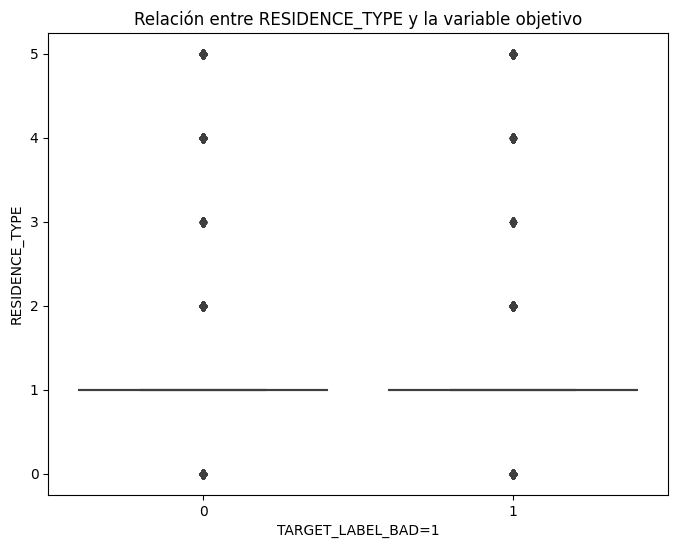

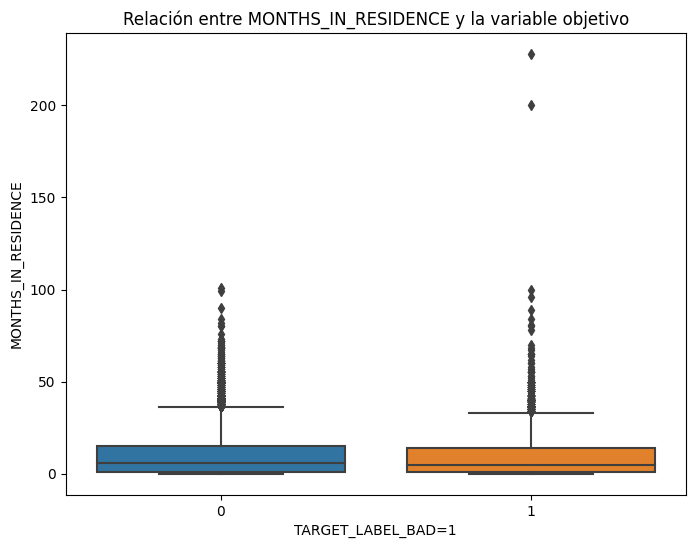

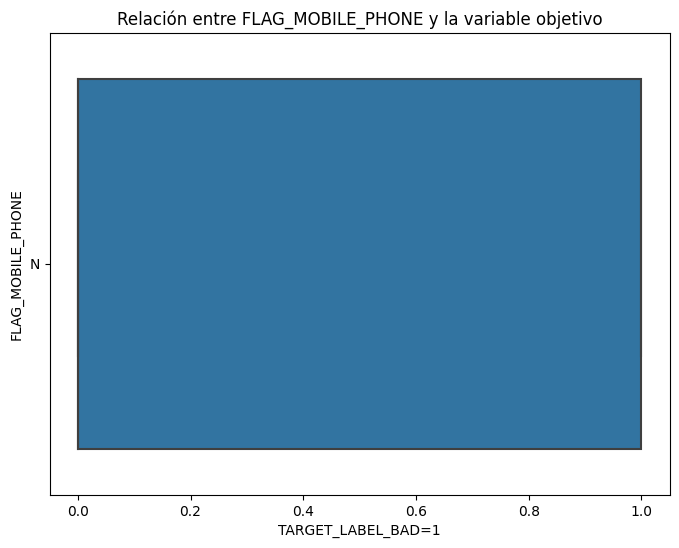

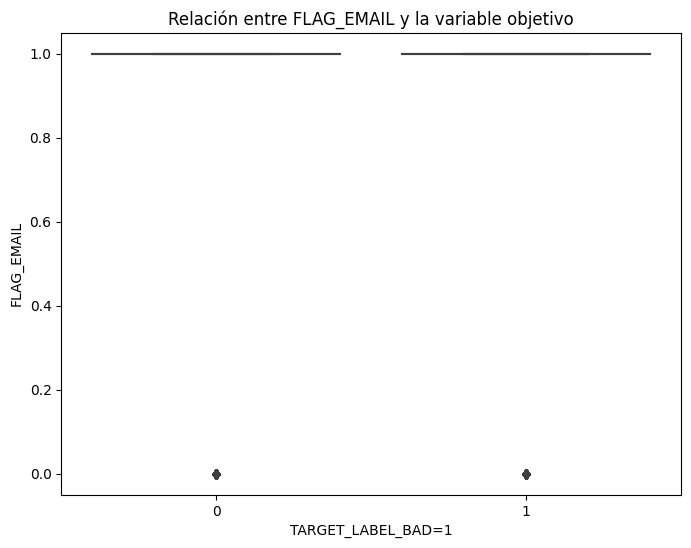

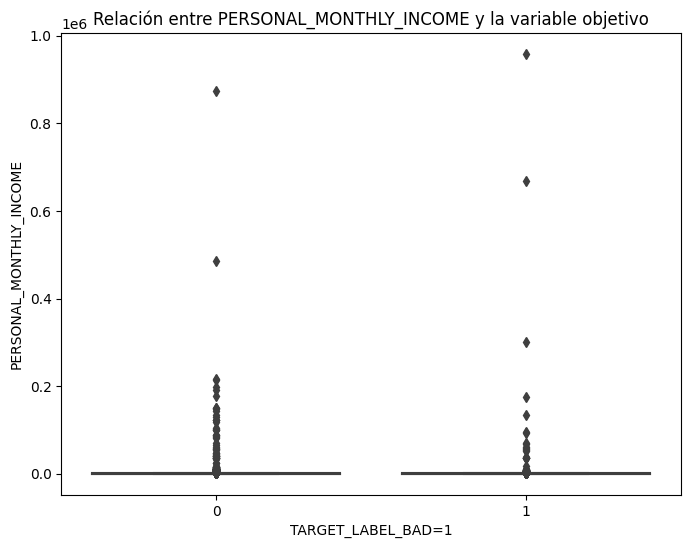

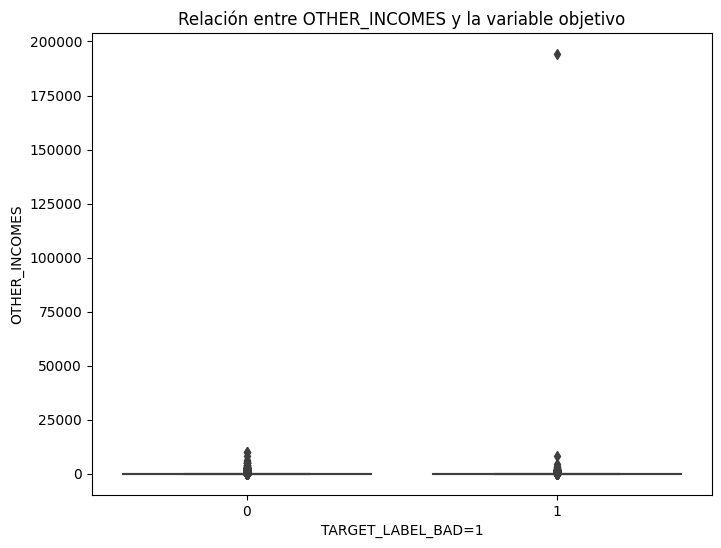

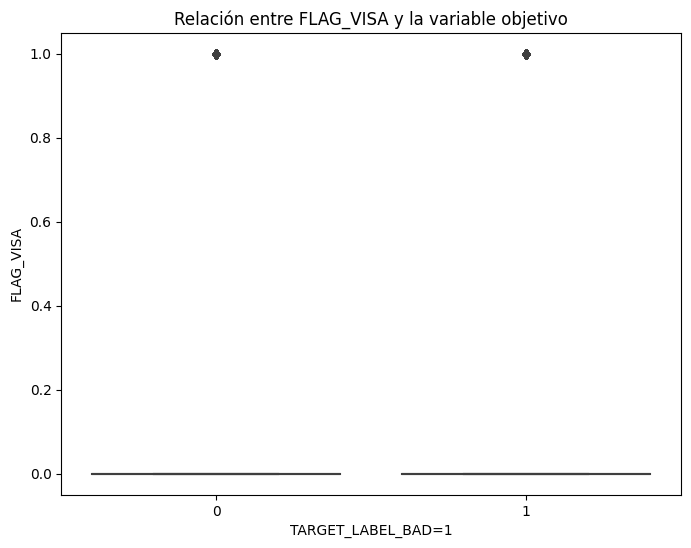

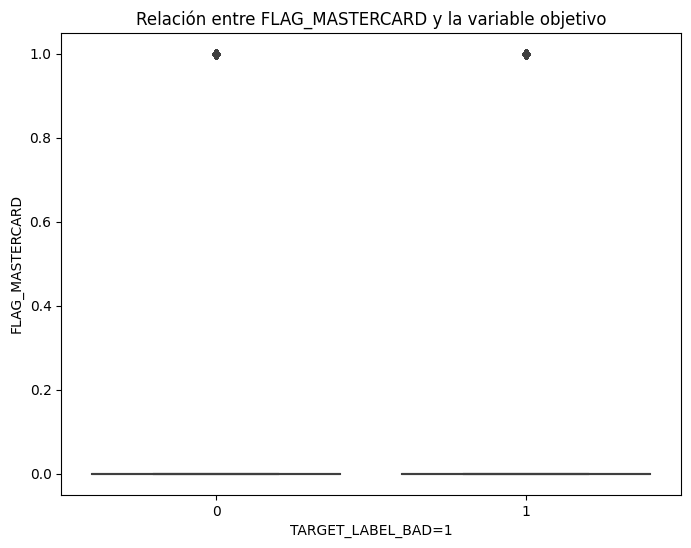

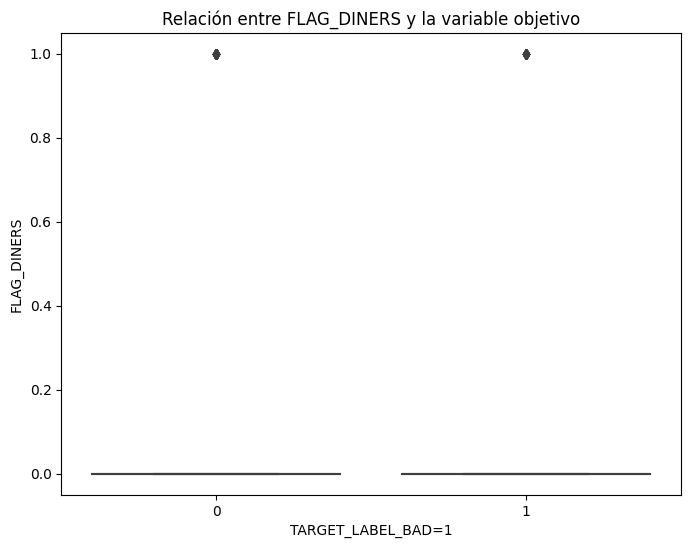

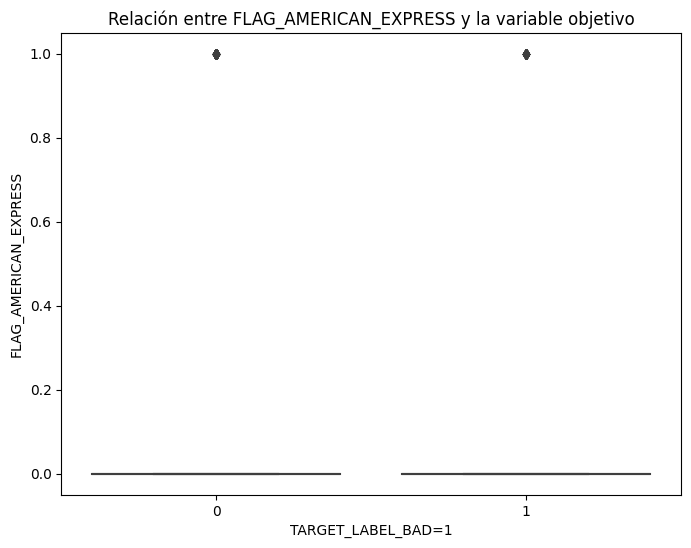

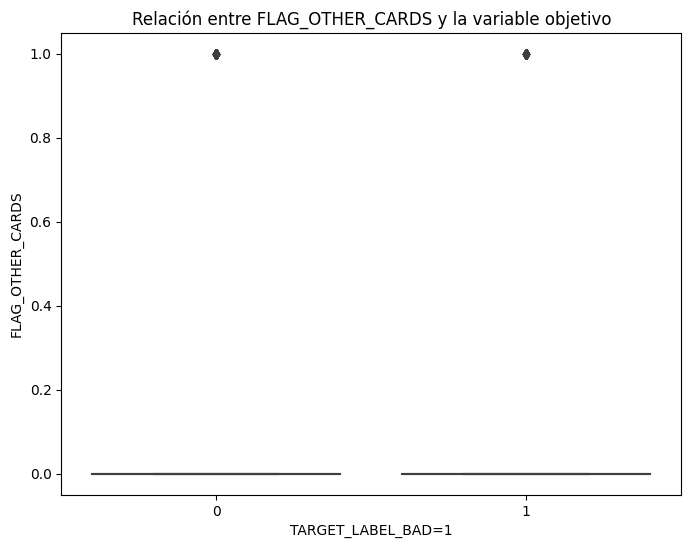

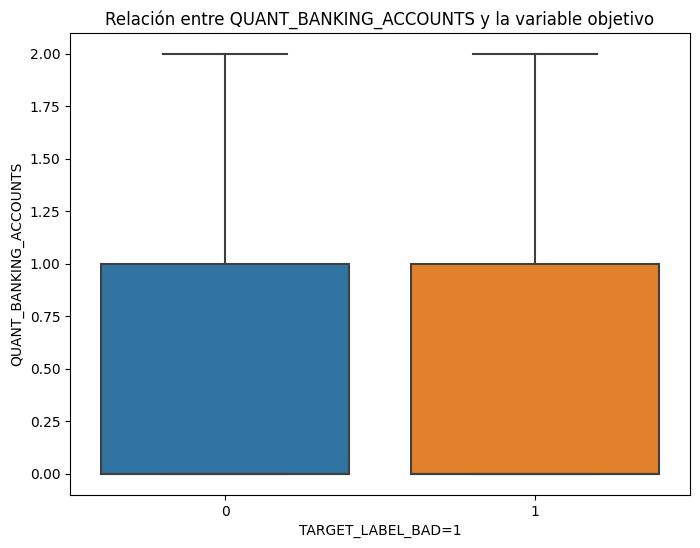

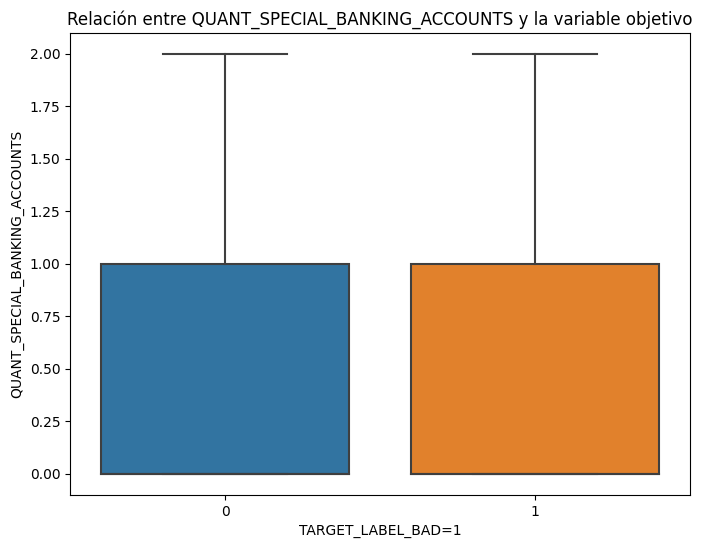

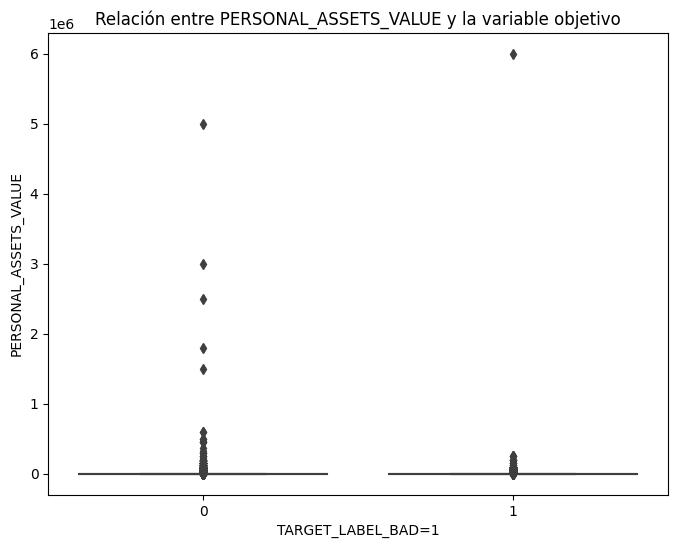

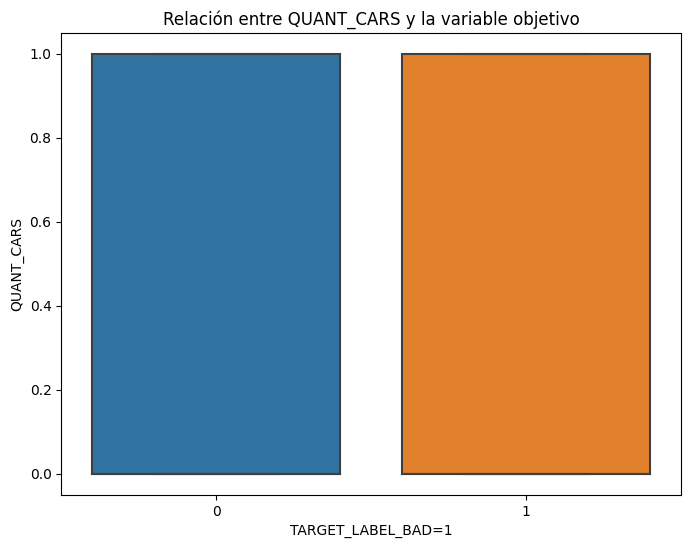

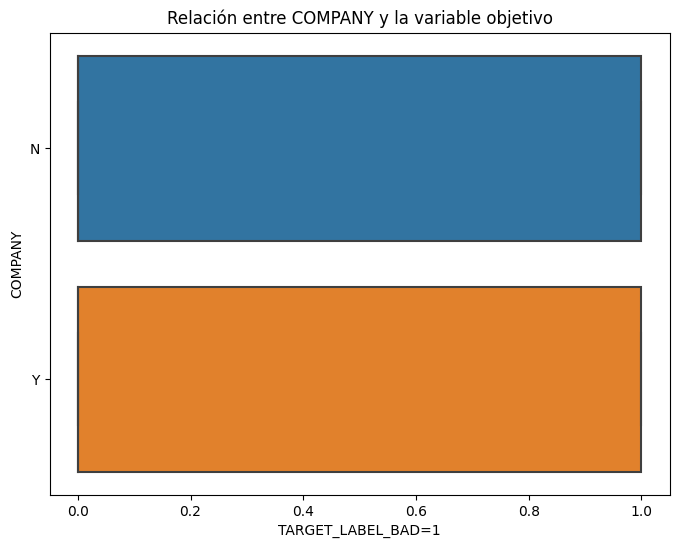

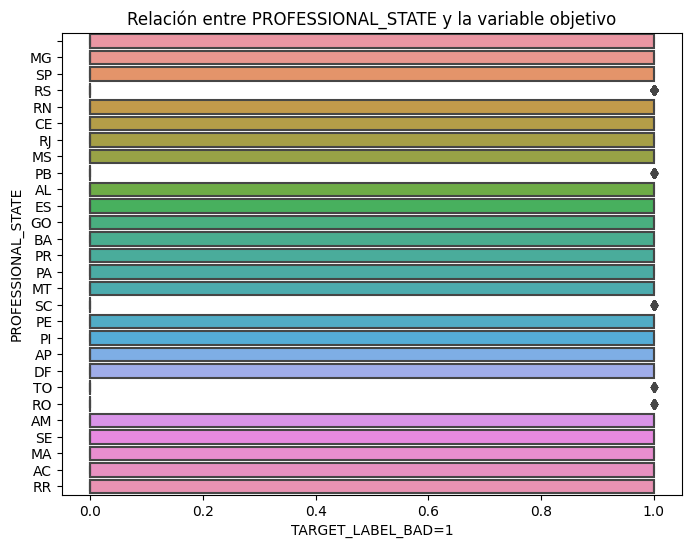

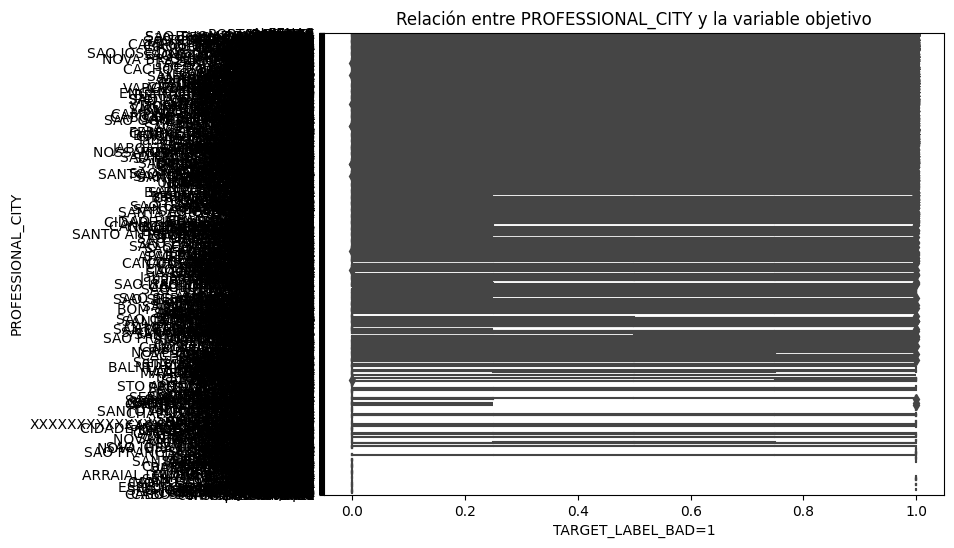

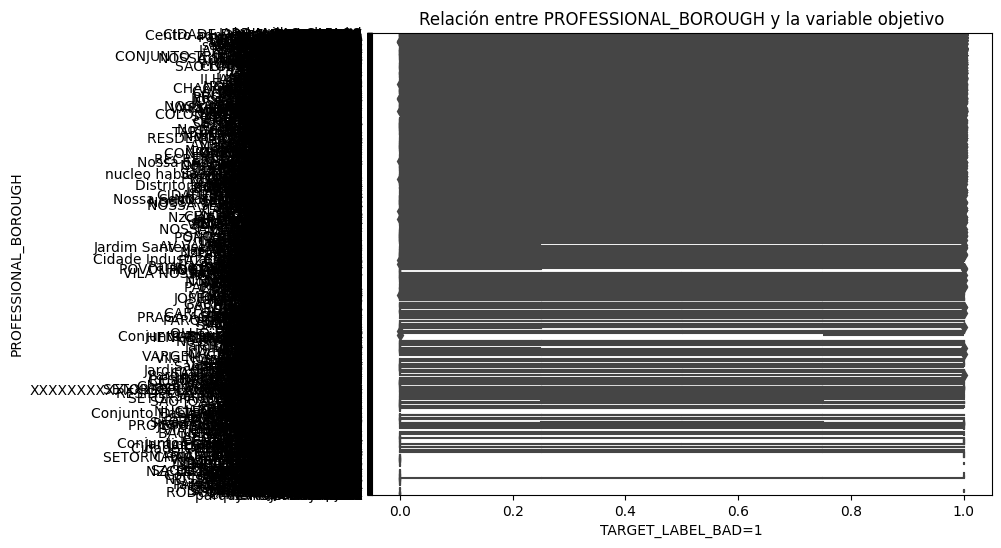

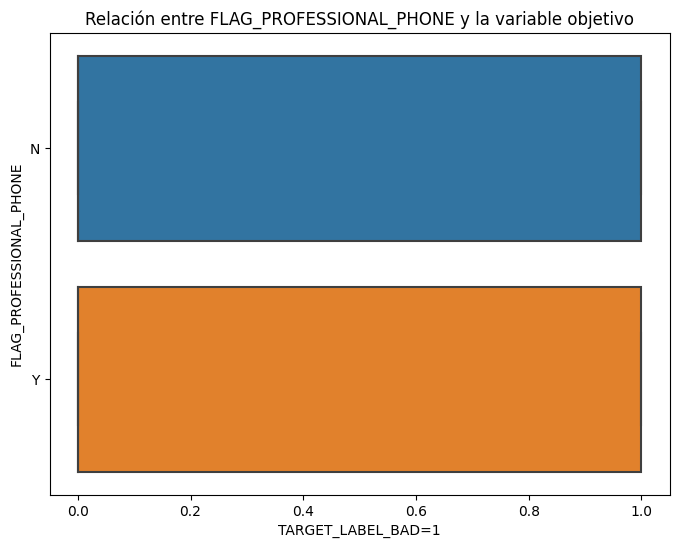

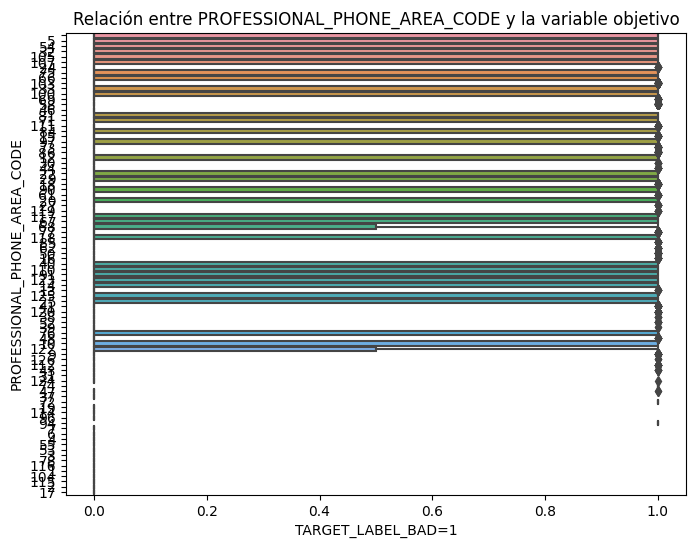

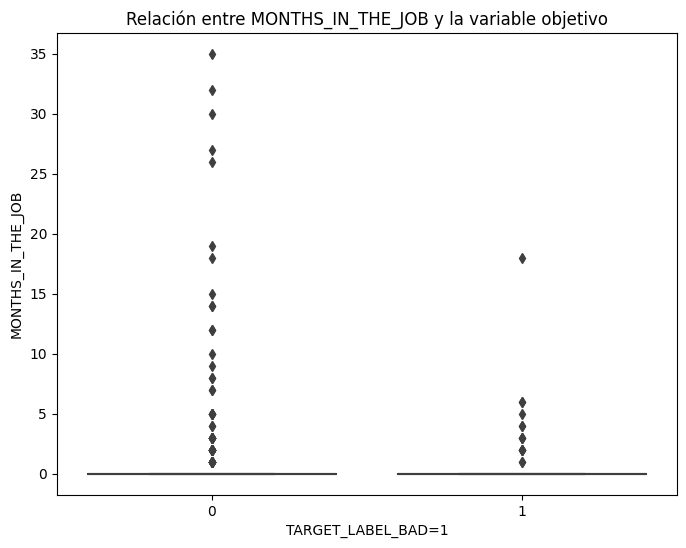

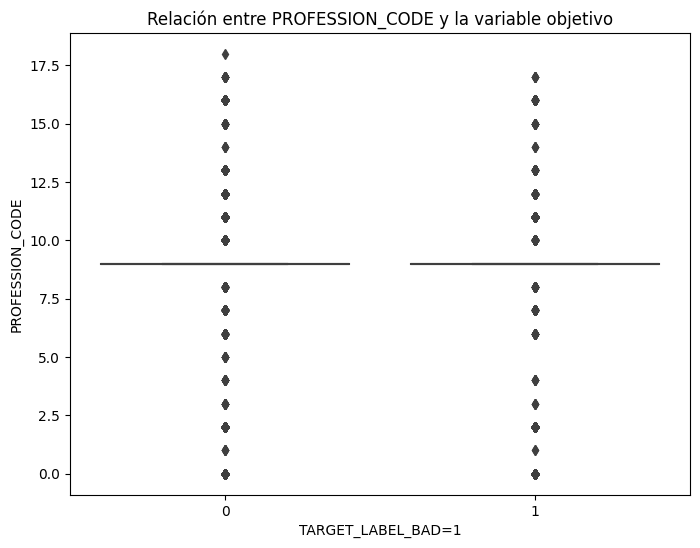

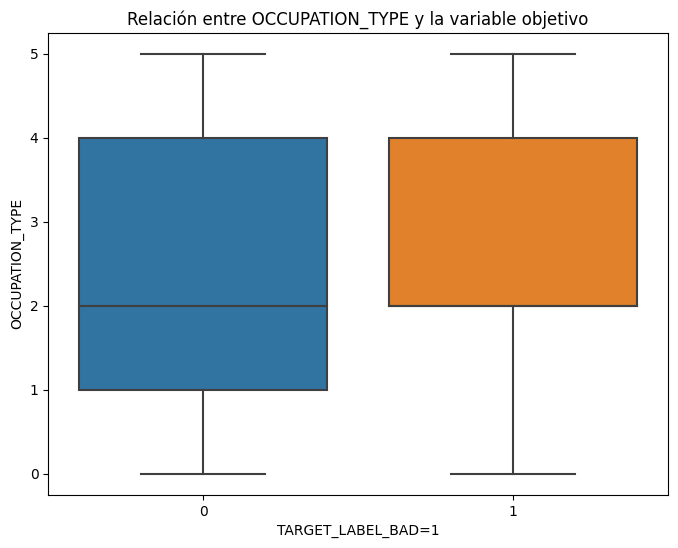

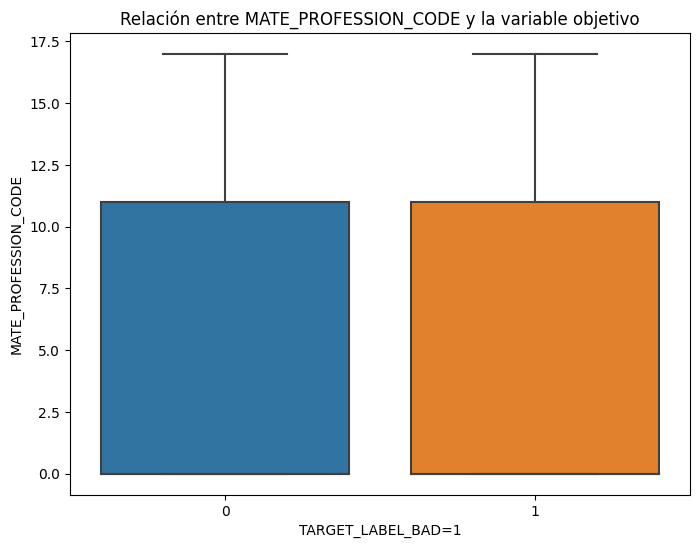

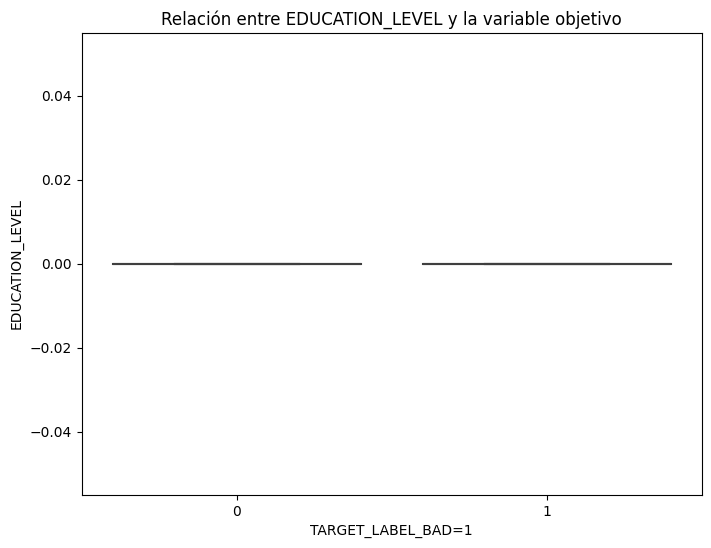

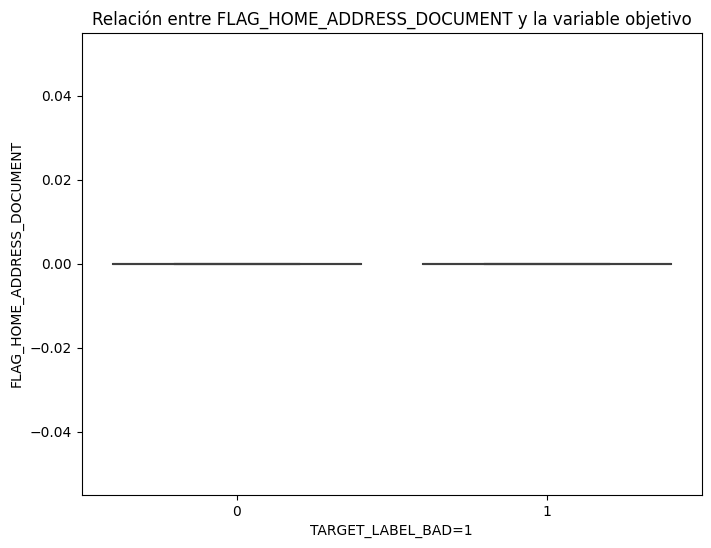

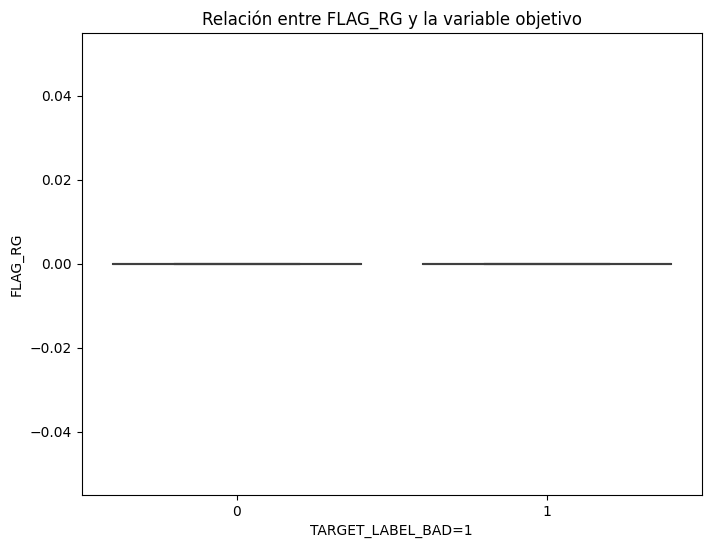

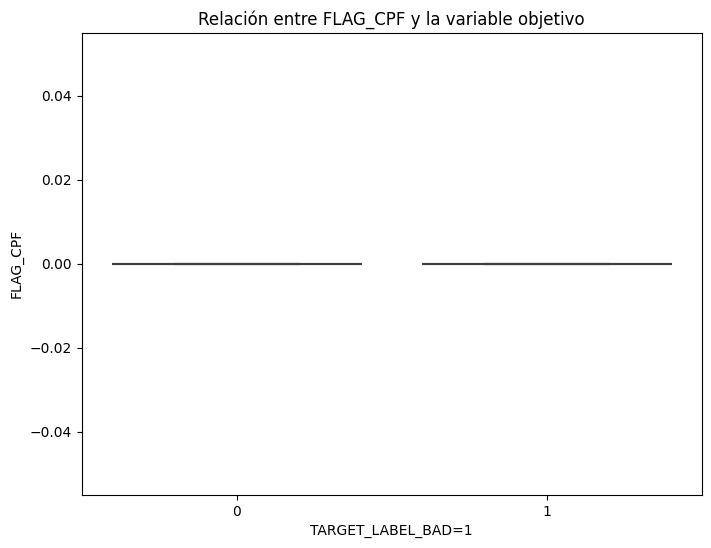

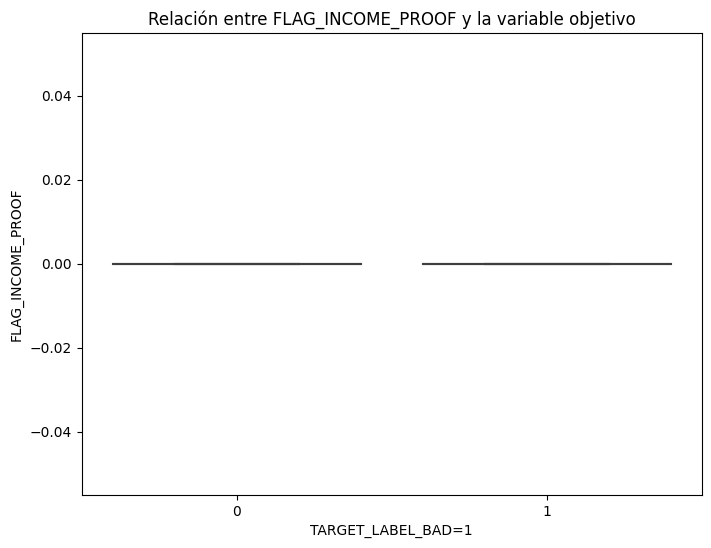

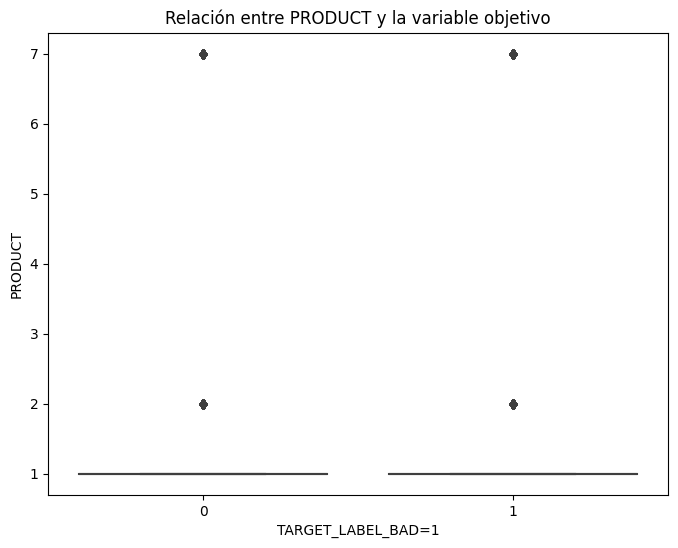

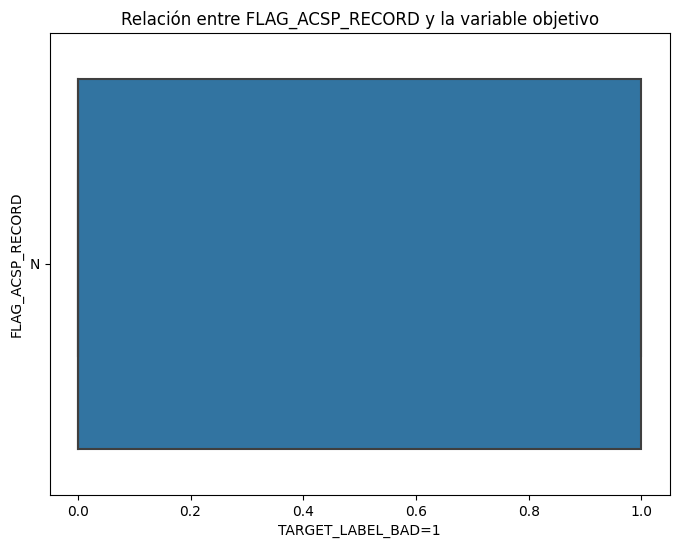

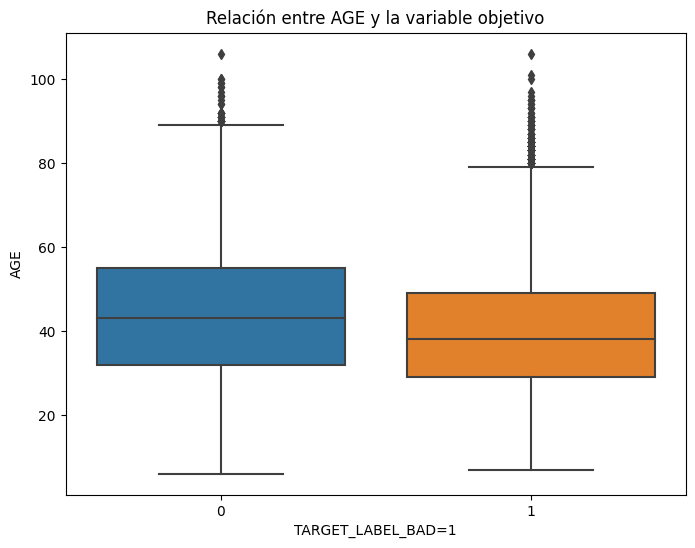

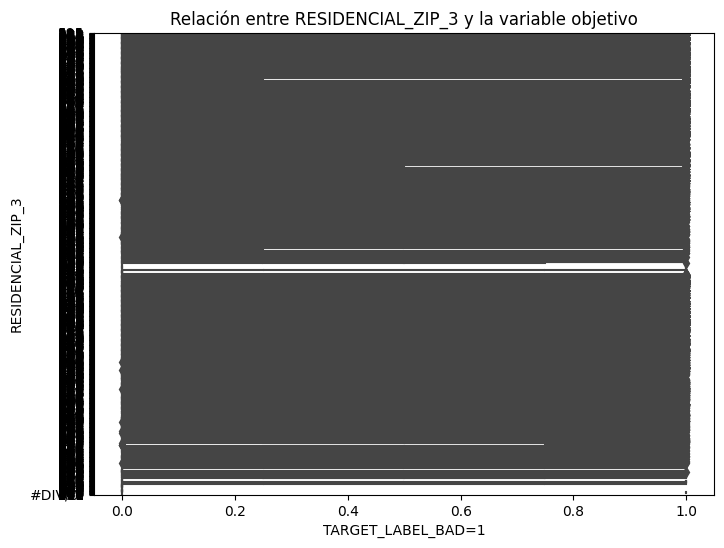

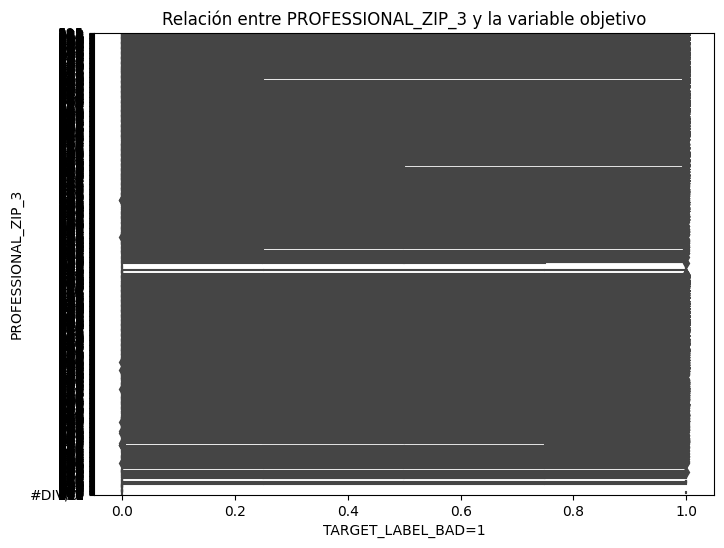

In [39]:
# Explorar la relación entre la variable objetivo y algunas variables numéricas
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=app_train['TARGET_LABEL_BAD=1'], y=app_train[column])
    plt.title(f'Relación entre {column} y la variable objetivo')
    plt.show()


In [42]:
print('null: ', app_train['PROFESSIONAL_STATE'].isna().sum())
print(app_train['PROFESSIONAL_STATE'].value_counts().sort_values())
print(app_train['PROFESSIONAL_STATE'].sort_values().unique())

null:  0
RR       16
TO       58
SE       62
AC       80
PI      100
AM      134
RO      170
MA      184
AP      186
ES      228
DF      271
SC      299
AL      337
MS      352
PB      373
GO      484
RN      492
MT      553
RJ      570
PR      582
PA      710
PE      902
MG     1251
BA     1387
CE     1420
RS     2092
SP     2400
      34307
Name: PROFESSIONAL_STATE, dtype: int64
[' ' 'AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']


In [43]:
app_train_sin_unicos = app_train.loc[:, app_train.nunique() != 1]

In [54]:
#app_train_sin_unicos.drop(columns=['ID_CLIENT'])

In [53]:
from sklearn.impute import SimpleImputer

# Asignamos la variable objetivo a 'y' y las características a 'X'
y = app_train_sin_unicos['TARGET_LABEL_BAD=1']
X = app_train_sin_unicos.drop(columns='TARGET_LABEL_BAD=1')

# Imputar los valores perdidos
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype(str)
        X[col] = cat_imputer.fit_transform(X[col].values.reshape(-1, 1))
    else:
        X[col] = num_imputer.fit_transform(X[col].values.reshape(-1, 1))

# Codificar las características categóricas
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Obtener la importancia de las características
importance = pd.DataFrame(data={
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance)


                           Feature  Importance
39                             AGE    0.081288
11             RESIDENCIAL_BOROUGH    0.078526
17         PERSONAL_MONTHLY_INCOME    0.075723
7                    CITY_OF_BIRTH    0.072355
10                RESIDENCIAL_CITY    0.067142
41              PROFESSIONAL_ZIP_3    0.058942
40               RESIDENCIAL_ZIP_3    0.058623
15             MONTHS_IN_RESIDENCE    0.056694
6                   STATE_OF_BIRTH    0.035110
13     RESIDENCIAL_PHONE_AREA_CODE    0.034717
0                      PAYMENT_DAY    0.032908
9                RESIDENCIAL_STATE    0.028593
36                 OCCUPATION_TYPE    0.026852
31            PROFESSIONAL_BOROUGH    0.024811
30               PROFESSIONAL_CITY    0.024645
35                 PROFESSION_CODE    0.024432
5                 QUANT_DEPENDANTS    0.024319
4                   MARITAL_STATUS    0.023456
14                  RESIDENCE_TYPE    0.016146
33    PROFESSIONAL_PHONE_AREA_CODE    0.015738
29           

In [52]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49935 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       49935 non-null  int64  
 1   CLERK_TYPE                      49935 non-null  object 
 2   PAYMENT_DAY                     49935 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     49935 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          49935 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             49935 non-null  int64  
 6   SEX                             49935 non-null  object 
 7   MARITAL_STATUS                  49935 non-null  int64  
 8   QUANT_DEPENDANTS                49935 non-null  int64  
 9   EDUCATION_LEVEL                 49935 non-null  int64  
 10  STATE_OF_BIRTH                  49935 non-null  object 
 11  CITY_OF_BIRTH                   49935 non-null  object 
 12  NACIONALITY                     

In [29]:
dtypes = {51: int, 52: int}

In [26]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       20000 non-null  int64  
 1   CLERK_TYPE                      20000 non-null  object 
 2   PAYMENT_DAY                     20000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     20000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          1273 non-null   float64
 5   POSTAL_ADDRESS_TYPE             20000 non-null  int64  
 6   SEX                             20000 non-null  object 
 7   MARITAL_STATUS                  20000 non-null  int64  
 8   QUANT_DEPENDANTS                20000 non-null  int64  
 9   EDUCATION_LEVEL                 20000 non-null  int64  
 10  STATE_OF_BIRTH                  20000 non-null  object 
 11  CITY_OF_BIRTH                   19990 non-null  object 
 12  NACIONALITY                     

In [24]:
dtypes = {51: int, 52: int}


### EDA